<a href="https://colab.research.google.com/github/marwahfaraj/music-genre-classification/blob/niyat-feature/03_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project: Music Genre Classification using Machine Learning
          
 Niyat Kahsay & Marwah Faraj
 Summer 2025

Description:

This project aims to automatically classify songs into genres based on audio features provided in the Spotify 1.2M Songs Dataset. The workflow includes data exploration, preprocessing, model building, evaluation, and visualization.

Purpose:

Apply supervised learning techniques on real-world audio data
Explore audio feature-based genre classification
Build a portfolio-ready project demonstrating practical machine learning skills

#Data Preparation

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, f1_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np
import time
import pandas as pd
import plotly.express as px
from scipy.stats import mode
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Load Data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/music-genre-classification/data/spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


#Data Exploration

In [4]:
print(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
data.describe(include = "all")

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833,32828,32828,32833.000000,32833,32828,32833,32833,32833,32833,...,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
unique,28356,23449,10692,NaN,22545,19743,4530,449,471,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,NaN,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,22,161,NaN,42,139,270,308,247,6043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,42.477081,NaN,NaN,NaN,NaN,NaN,NaN,...,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,NaN,NaN,NaN,24.984074,NaN,NaN,NaN,NaN,NaN,NaN,...,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000


In [7]:
# Feature engineering
data['track_album_release_year'] = pd.to_datetime(
      data['track_album_release_date'], errors='coerce').dt.year
data['track_album_release_year'].fillna(data['track_album_release_year'].median(), inplace=True)
data['duration_s'] = data['duration_ms'] / 1000  # Convert to seconds
data.drop('duration_ms', axis=1, inplace=True)

In [8]:
# Encode target variable
genre_encoder = LabelEncoder()
data['genre_encoded'] = genre_encoder.fit_transform(data['playlist_genre'])

In [9]:
# Select relevant features
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_s',
            'track_popularity', 'track_album_release_year']

X = data[features]
y = data['genre_encoded']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Model Development

In [12]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(random_state=42, probability=True)
}

In [13]:
# Cross-validation evaluation
results = {}
for name, model in models.items():
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = {
        'cv_accuracy': np.mean(cv_scores),
        'cv_time': time.time() - start_time
    }
    print(f"{name} - Avg CV Accuracy: {np.mean(cv_scores):.4f} - Time: {results[name]['cv_time']:.2f}s")

Random Forest - Avg CV Accuracy: 0.5739 - Time: 53.64s
Gradient Boosting - Avg CV Accuracy: 0.5715 - Time: 264.90s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:03:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:03:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:03:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:03:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:03:20] WARNING: /w

XGBoost - Avg CV Accuracy: 0.5876 - Time: 21.61s
SVM - Avg CV Accuracy: 0.5548 - Time: 742.22s


In [14]:
# Select best model based on CV
best_model_name = max(results, key=lambda x: results[x]['cv_accuracy'])
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: XGBoost


In [15]:
# Hyperparameter tuning for best model
# Best model: XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    models['XGBoost'],
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:17:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV accuracy: 0.5883


##Model Evaluation

In [16]:
# Train final model
best_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, target_names=genre_encoder.classes_)

print("\n" + "="*50)
print(f"Final Model: {best_model_name}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:18:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Final Model: XGBoost
Test Accuracy: 0.5959
Weighted F1 Score: 0.5940

Classification Report:
              precision    recall  f1-score   support

         edm       0.69      0.70      0.70      1209
       latin       0.53      0.48      0.51      1031
         pop       0.43      0.45      0.44      1102
         r&b       0.55      0.48      0.51      1086
         rap       0.61      0.67      0.64      1149
        rock       0.76      0.79      0.77       990

    accuracy                           0.60      6567
   macro avg       0.59      0.60      0.59      6567
weighted avg       0.59      0.60      0.59      6567



Low performance in 'latin' and 'pop.
Will do, resampling

In [17]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [18]:
grid_search_smote = GridSearchCV(
    models['XGBoost'],  # Same XGBoost model
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model on the SMOTE-balanced data
grid_search_smote.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set (not resampled!)
y_pred_smote = grid_search_smote.predict(X_test_scaled)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:20:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("\n" + "="*50)
print("SMOTE Model Performance:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Weighted F1 Score:", f1_score(y_test, y_pred_smote, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))




SMOTE Model Performance:
Test Accuracy: 0.596771737475255
Weighted F1 Score: 0.5949522484302238

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      1209
           1       0.52      0.51      0.51      1031
           2       0.43      0.44      0.44      1102
           3       0.54      0.47      0.50      1086
           4       0.62      0.67      0.64      1149
           5       0.74      0.80      0.77       990

    accuracy                           0.60      6567
   macro avg       0.59      0.60      0.59      6567
weighted avg       0.59      0.60      0.59      6567



##But some results went down, so we are keeping the original model

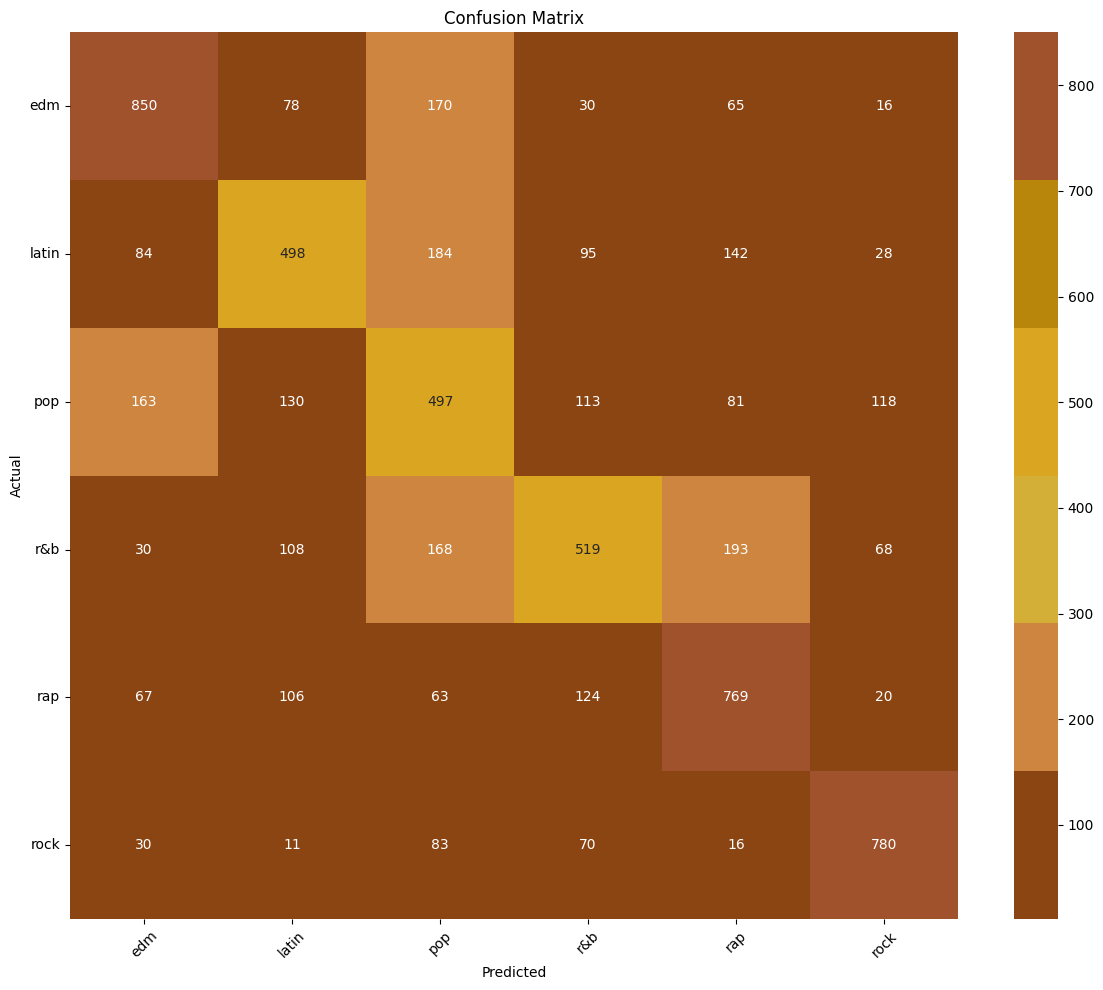

In [20]:
import os
import matplotlib.pyplot as plt # Import pyplot
import seaborn as sns # Import seaborn if needed
import numpy as np # Import numpy if needed
from sklearn.metrics import confusion_matrix # Import confusion_matrix if needed


# Ensure the directory exists
if not os.path.exists('images/models'):
    os.makedirs('images/models')

# Set up white background and golden color scheme
plt.style.use('default') # Use default style for white background
golden_palette = ['#8B4513', '#CD853F', '#D4AF37', '#DAA520', '#B8860B', '#A0522D'] # Adjusted golden palette


# Confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=golden_palette,
              xticklabels=genre_encoder.classes_,
              yticklabels=genre_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('images/models/confusion_matrix.png')
plt.show()

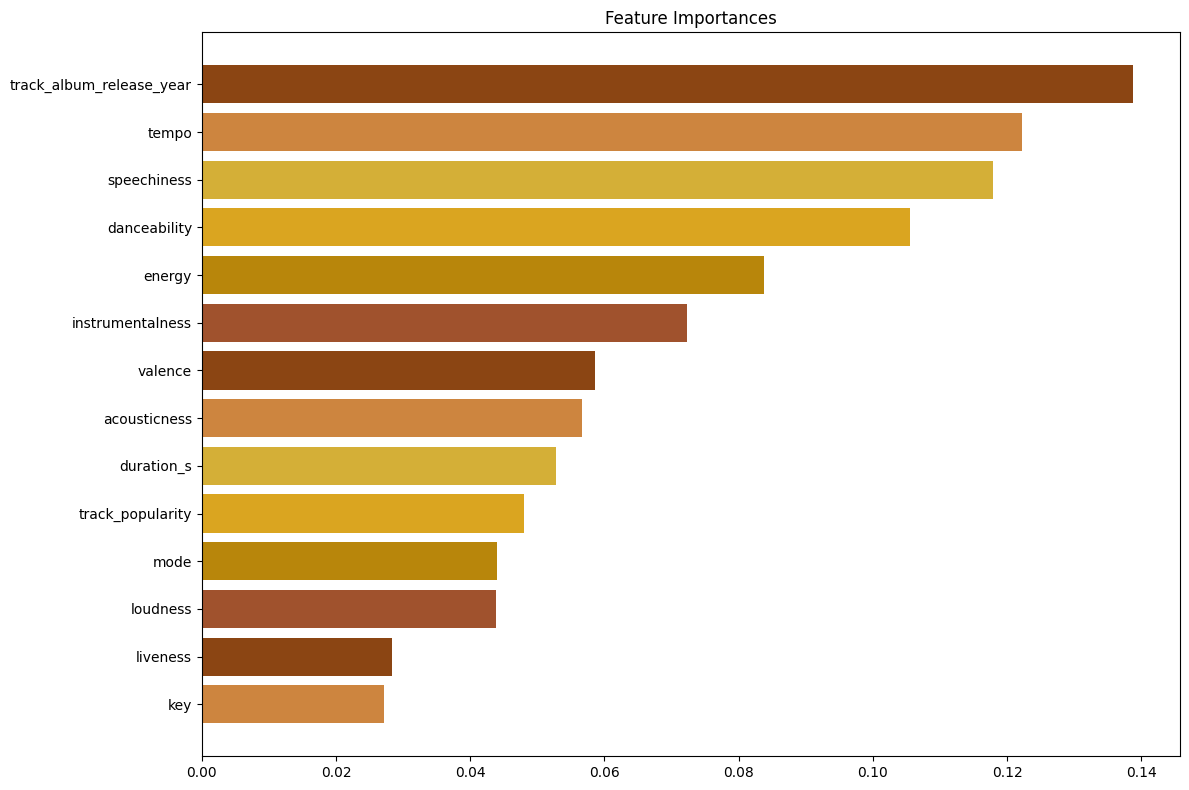

In [21]:
import os
import matplotlib.pyplot as plt # Import pyplot
import numpy as np # Import numpy if needed

# Ensure the directory exists
if not os.path.exists('images/models'):
    os.makedirs('images/models')

# Set up white background and golden color scheme
plt.style.use('default') # Use default style for white background
golden_palette = ['#8B4513', '#CD853F', '#D4AF37', '#DAA520', '#B8860B', '#A0522D'] # Adjusted golden palette


# Feature importance
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12, 8))
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.title('Feature Importances')
    # Use all colors in the palette, repeating if necessary
    colors = np.tile(golden_palette, len(indices) // len(golden_palette) + 1)[:len(indices)]
    plt.barh(range(len(indices)), importances[indices], align='center', color=colors) # Changed color to use the palette
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('images/models/feature_importances.png')
    plt.show()

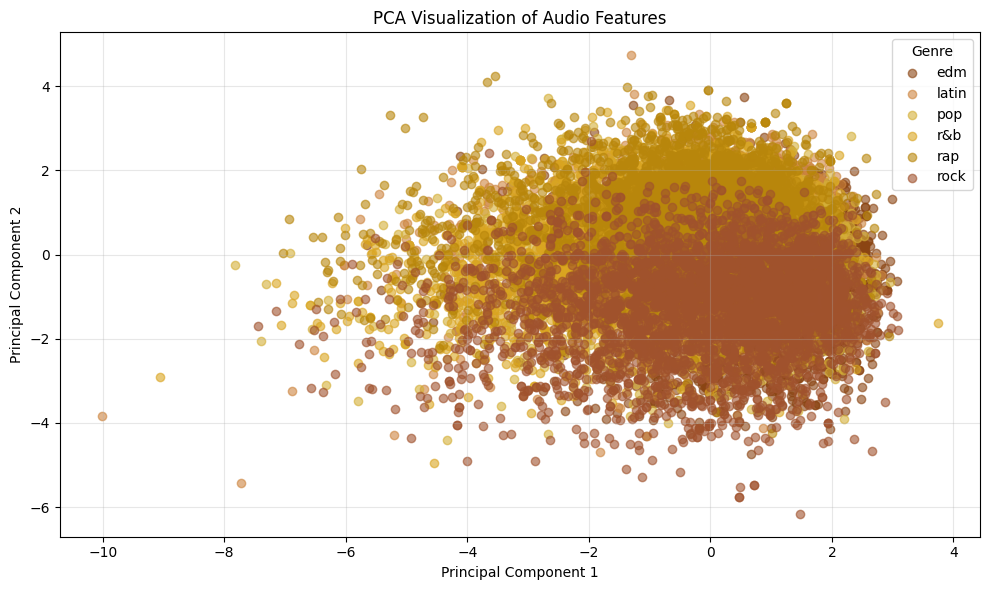

In [22]:
import os
import matplotlib.pyplot as plt # Import pyplot
import numpy as np # Import numpy if needed
from sklearn.decomposition import PCA # Import PCA if needed

# Ensure the directory exists
if not os.path.exists('images/models'):
    os.makedirs('images/models')

# Set up white background and golden color scheme
plt.style.use('default') # Use default style for white background
golden_palette = ['#8B4513', '#CD853F', '#D4AF37', '#DAA520', '#B8860B', '#A0522D'] # Adjusted golden palette


# PCA for dimensionality reduction (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
for i, genre in enumerate(np.unique(y_train)):
    plt.scatter(X_pca[y_train == genre, 0],
                X_pca[y_train == genre, 1],
                label=genre_encoder.inverse_transform([genre])[0],
                alpha=0.6,
                color=golden_palette[i % len(golden_palette)])
plt.title('PCA Visualization of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Genre')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('images/models/pca_visualization.png')
plt.show()

## Define the deep learning model


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Determine the number of unique genres
num_genres = len(np.unique(y_train))

# Define the deep learning model
dl_model = Sequential()

# Input layer and first hidden layer with dropout
dl_model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
dl_model.add(Dropout(0.3)) # Added dropout

# Second hidden layer with dropout
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dropout(0.3)) # Added dropout

# Output layer
dl_model.add(Dense(num_genres, activation='softmax'))

# Compile the model
dl_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Added compile

dl_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,566 (41.27 KB)

 Trainable params: 10,566 (41.27 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model


In [24]:
dl_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the model


In [25]:
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

# Instantiate EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) # Increased patience

history = dl_model.fit(X_train_scaled, y_train,
                       epochs=50,
                       batch_size=64,
                       validation_split=0.2,
                       callbacks=[early_stopping]) # Added EarlyStopping callback

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3770 - loss: 1.5556 - val_accuracy: 0.4996 - val_loss: 1.2937
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4725 - loss: 1.3580 - val_accuracy: 0.5167 - val_loss: 1.2565
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4908 - loss: 1.3211 - val_accuracy: 0.5223 - val_loss: 1.2317
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5087 - loss: 1.2842 - val_accuracy: 0.5314 - val_loss: 1.2141
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5208 - loss: 1.2623 - val_accuracy: 0.5402 - val_loss: 1.1994
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5198 - loss: 1.2628 - val_accuracy: 0.5384 - val_loss: 1.1942
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5301 - loss: 1.2388 - val_accuracy: 0.5463 - val_loss: 1.1877
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5334 - loss: 1.2316 - val_accuracy: 0.

## Evaluate the deep learning model

In [26]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Evaluate the model on the test data
loss, accuracy = dl_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Deep Learning Model Test Accuracy: {accuracy:.4f}")

# Make predictions and calculate F1-score and classification report
y_pred_dl_proba = dl_model.predict(X_test_scaled)
y_pred_dl = np.argmax(y_pred_dl_proba, axis=1)

f1_dl = f1_score(y_test, y_pred_dl, average='weighted')
class_report_dl = classification_report(y_test, y_pred_dl, target_names=genre_encoder.classes_)

print(f"Deep Learning Model Weighted F1 Score: {f1_dl:.4f}")
print("\nDeep Learning Model Classification Report:")
print(class_report_dl)

Deep Learning Model Test Accuracy: 0.5674
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Deep Learning Model Weighted F1 Score: 0.5613

Deep Learning Model Classification Report:
              precision    recall  f1-score   support

         edm       0.68      0.68      0.68      1209
       latin       0.54      0.40      0.46      1031
         pop       0.40      0.40      0.40      1102
         r&b       0.53      0.44      0.48      1086
         rap       0.55      0.69      0.62      1149
        rock       0.68      0.78      0.73       990

    accuracy                           0.57      6567
   macro avg       0.56      0.57      0.56      6567
weighted avg       0.56      0.57      0.56      6567



## Compare models

## Visualize deep learning results

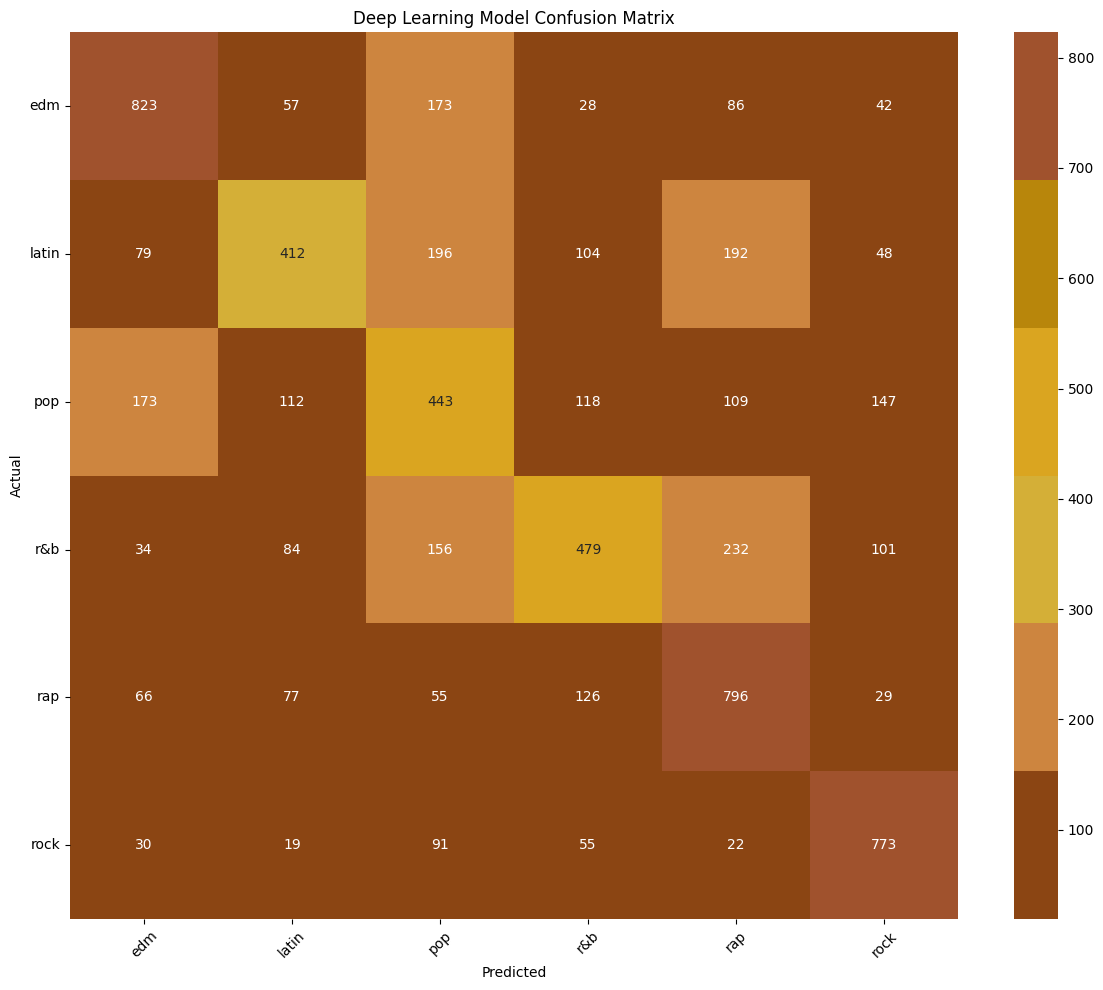

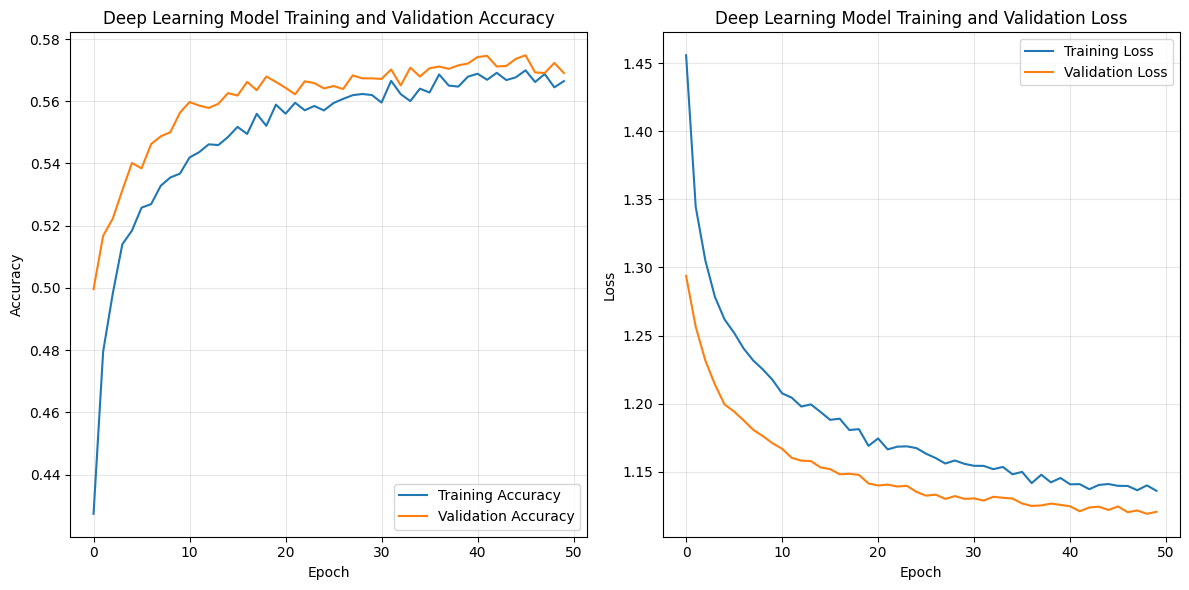

In [27]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Ensure the directory exists
if not os.path.exists('images/models'):
    os.makedirs('images/models')

# Set up white background and golden color scheme
plt.style.use('default')
golden_palette = ['#8B4513', '#CD853F', '#D4AF37', '#DAA520', '#B8860B', '#A0522D']

# Confusion matrix for Deep Learning Model
plt.figure(figsize=(12, 10))
cm_dl = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap=golden_palette,
            xticklabels=genre_encoder.classes_,
            yticklabels=genre_encoder.classes_)
plt.title('Deep Learning Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('images/models/dl_confusion_matrix.png')
plt.show()

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deep Learning Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Deep Learning Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('images/models/dl_training_history.png')
plt.show()

## Relocate and modify pca


In [29]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

Original number of features: 14
Reduced number of features after PCA: 12


## Train traditional ml models with pca

In [30]:
# Train traditional models on PCA-transformed data
models_pca = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    models_pca[f'{name}_PCA'] = model
    print(f"{name} (PCA) - Training Time: {time.time() - start_time:.2f}s")

Random Forest (PCA) - Training Time: 14.54s
Gradient Boosting (PCA) - Training Time: 114.52s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:24:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (PCA) - Training Time: 3.65s
SVM (PCA) - Training Time: 214.44s


In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Evaluate traditional models on PCA-transformed test data
results_pca = {}
for name, model in models_pca.items():
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
    results_pca[name] = {
        'test_accuracy': accuracy_pca,
        'weighted_f1': f1_pca
    }
    print(f"\n{name} - Test Accuracy: {accuracy_pca:.4f}")
    print(f"{name} - Weighted F1 Score: {f1_pca:.4f}")
    # Print classification report for detailed analysis
    # print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred_pca, target_names=genre_encoder.classes_))


Random Forest_PCA - Test Accuracy: 0.5173
Random Forest_PCA - Weighted F1 Score: 0.5131

Gradient Boosting_PCA - Test Accuracy: 0.5071
Gradient Boosting_PCA - Weighted F1 Score: 0.5055

XGBoost_PCA - Test Accuracy: 0.5228
XGBoost_PCA - Weighted F1 Score: 0.5203

SVM_PCA - Test Accuracy: 0.5381
SVM_PCA - Weighted F1 Score: 0.5350


## Define and compile deep learning model for pca data


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Determine the number of unique genres
num_genres = len(np.unique(y_train))

# Define the deep learning model for PCA-transformed data
dl_model_pca = Sequential()

# Input layer and first hidden layer with dropout, using PCA-transformed input shape
dl_model_pca.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
dl_model_pca.add(Dropout(0.3)) # Added dropout

# Second hidden layer with dropout
dl_model_pca.add(Dense(64, activation='relu'))
dl_model_pca.add(Dropout(0.3)) # Added dropout

# Output layer
dl_model_pca.add(Dense(num_genres, activation='softmax'))

# Compile the model
dl_model_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Added compile

dl_model_pca.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,310 (40.27 KB)

 Trainable params: 10,310 (40.27 KB)

 Non-trainable params: 0 (0.00 B)

## Train deep learning model with pca


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Instantiate EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the deep learning model for PCA-transformed data
history_pca = dl_model_pca.fit(X_train_pca, y_train,
                       epochs=50,
                       batch_size=64,
                       validation_split=0.2,
                       callbacks=[early_stopping])

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3636 - loss: 1.5692 - val_accuracy: 0.4909 - val_loss: 1.3089
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4691 - loss: 1.3611 - val_accuracy: 0.5027 - val_loss: 1.2749
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4893 - loss: 1.3214 - val_accuracy: 0.5110 - val_loss: 1.2566
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4955 - loss: 1.3008 - val_accuracy: 0.5194 - val_loss: 1.2383
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5022 - loss: 1.2836 - val_accuracy: 0.5154 - val_loss: 1.2323
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5102 - loss: 1.2700 - val_accuracy: 0.5242 - val_loss: 1.2237
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5094 - loss: 1.2721 - val_accuracy: 0.5287 - val_loss: 1.2158
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5235 - loss: 1.2465 - val_accuracy: 0.

## Evaluate deep learning model with PCA

In [34]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Evaluate the deep learning model trained on PCA data
loss_dl_pca, accuracy_dl_pca = dl_model_pca.evaluate(X_test_pca, y_test, verbose=0)
print(f"Deep Learning Model (PCA) Test Accuracy: {accuracy_dl_pca:.4f}")

# Make predictions and calculate F1-score and classification report for the DL model with PCA
y_pred_dl_pca_proba = dl_model_pca.predict(X_test_pca)
y_pred_dl_pca = np.argmax(y_pred_dl_pca_proba, axis=1)

f1_dl_pca = f1_score(y_test, y_pred_dl_pca, average='weighted')
class_report_dl_pca = classification_report(y_test, y_pred_dl_pca, target_names=genre_encoder.classes_)

print(f"Deep Learning Model (PCA) Weighted F1 Score: {f1_dl_pca:.4f}")
print("\nDeep Learning Model (PCA) Classification Report:")
print(class_report_dl_pca)

Deep Learning Model (PCA) Test Accuracy: 0.5526
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Deep Learning Model (PCA) Weighted F1 Score: 0.5465

Deep Learning Model (PCA) Classification Report:
              precision    recall  f1-score   support

         edm       0.65      0.68      0.66      1209
       latin       0.51      0.42      0.46      1031
         pop       0.39      0.38      0.38      1102
         r&b       0.53      0.41      0.46      1086
         rap       0.56      0.68      0.61      1149
        rock       0.65      0.74      0.69       990

    accuracy                           0.55      6567
   macro avg       0.55      0.55      0.55      6567
weighted avg       0.55      0.55      0.55      6567



## Compare all model performances

In [35]:
import pandas as pd

# Create a dictionary to store the results
all_results = {
    'Traditional ML (Original)': results,
    'Traditional ML (PCA)': results_pca,
    'Deep Learning (Original)': {'Test Accuracy': accuracy, 'Weighted F1 Score': f1},
    'Deep Learning (PCA)': {'Test Accuracy': accuracy_dl_pca, 'Weighted F1 Score': f1_dl_pca}
}

# Convert results to a pandas DataFrame for easy comparison
comparison_data = []

for model_type, model_results in all_results.items():
    if 'Traditional ML' in model_type:
        for model_name, metrics in model_results.items():
            comparison_data.append({
                'Model Type': model_type,
                'Model Name': model_name,
                'Test Accuracy': metrics.get('test_accuracy', metrics.get('cv_accuracy')), # Handle both keys
                'Weighted F1 Score': metrics.get('weighted_f1')
            })
    else:
         comparison_data.append({
            'Model Type': model_type,
            'Model Name': model_type, # Use model type as name for DL
            'Test Accuracy': model_results['Test Accuracy'],
            'Weighted F1 Score': model_results['Weighted F1 Score']
        })


comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("Model Performance Comparison:")
display(comparison_df.round(4))

Model Performance Comparison:


,Model Type,Model Name,Test Accuracy,Weighted F1 Score
0,Traditional ML (Original),Random Forest,0.5739,NaN
1,Traditional ML (Original),Gradient Boosting,0.5715,NaN
2,Traditional ML (Original),XGBoost,0.5876,NaN
3,Traditional ML (Original),SVM,0.5548,NaN
4,Traditional ML (PCA),Random Forest_PCA,0.5173,0.5131
5,Traditional ML (PCA),Gradient Boosting_PCA,0.5071,0.5055
6,Traditional ML (PCA),XGBoost_PCA,0.5228,0.5203
7,Traditional ML (PCA),SVM_PCA,0.5381,0.5350
8,Deep Learning (Original),Deep Learning (Original),0.5674,0.5940
9,Deep Learning (PCA),Deep Learning (PCA),0.5526,0.5465


## Install autogluon


In [36]:
# %pip install --quiet autogluon

## Train AutoGluon Model

In [38]:
%pip install --quiet autogluon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.9/454.9 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.3/487.3 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 10.6 MB/s eta 0:0

In [39]:
from autogluon.tabular import TabularPredictor
import time

# Prepare data for AutoGluon
# AutoGluon works directly with pandas DataFrames, so we can use the original X_train and y_train
# We need to combine X_train and y_train into a single DataFrame for AutoGluon
train_data = X_train.copy()
train_data['genre_encoded'] = y_train

# Specify the label column
label = 'genre_encoded'

# Initialize and train the AutoGluon predictor
start_time = time.time()
# Exclude NeuralNetTorch model
predictor = TabularPredictor(label=label, eval_metric='accuracy').fit(train_data, excluded_model_types=['NN_TORCH'])
autogluon_train_time = time.time() - start_time

print(f"AutoGluon Model Training Time: {autogluon_train_time:.2f}s")

No path specified. Models will be saved in: "AutogluonModels/ag-20250810_233546"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.55 GB / 12.67 GB (83.3%)
Disk Space Avail:   63.61 GB / 107.72 GB (59.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU me

AutoGluon Model Training Time: 215.07s


## Evaluate AutoGluon Model

In [40]:
# Evaluate the AutoGluon model on the test data
# AutoGluon's predictor object can directly predict on a DataFrame
test_data = X_test.copy()
y_pred_autogluon = predictor.predict(test_data)
y_proba_autogluon = predictor.predict_proba(test_data)

# Calculate evaluation metrics
accuracy_autogluon = accuracy_score(y_test, y_pred_autogluon)
f1_autogluon = f1_score(y_test, y_pred_autogluon, average='weighted')

print("\n" + "="*50)
print("AutoGluon Model Performance:")
print(f"Test Accuracy: {accuracy_autogluon:.4f}")
print(f"Weighted F1 Score: {f1_autogluon:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_autogluon, target_names=genre_encoder.classes_))


AutoGluon Model Performance:
Test Accuracy: 0.5893
Weighted F1 Score: 0.5875

Classification Report:
              precision    recall  f1-score   support

         edm       0.68      0.70      0.69      1209
       latin       0.54      0.47      0.51      1031
         pop       0.39      0.42      0.40      1102
         r&b       0.54      0.48      0.50      1086
         rap       0.62      0.68      0.65      1149
        rock       0.76      0.78      0.77       990

    accuracy                           0.59      6567
   macro avg       0.59      0.59      0.59      6567
weighted avg       0.59      0.59      0.59      6567



## Compare all model performances

In [41]:
import pandas as pd

# Initialize results and results_pca as empty dictionaries if they are not defined
if 'results' not in locals():
    results = {}
if 'results_pca' not in locals():
    results_pca = {}

# Create a dictionary to store the results
all_results = {
    'Traditional ML (Original)': results,
    'Traditional ML (PCA)': results_pca,
}

# Add Deep Learning (Original) results if available
if 'accuracy' in locals() and 'f1' in locals():
    all_results['Deep Learning (Original)'] = {'Test Accuracy': accuracy, 'Weighted F1 Score': f1}

# Add Deep Learning (PCA) results if available
if 'accuracy_dl_pca' in locals() and 'f1_dl_pca' in locals():
    all_results['Deep Learning (PCA)'] = {'Test Accuracy': accuracy_dl_pca, 'Weighted F1 Score': f1_dl_pca}

# Add AutoGluon results if available
if 'accuracy_autogluon' in locals() and 'f1_autogluon' in locals():
    all_results['AutoGluon'] = {'Test Accuracy': accuracy_autogluon, 'Weighted F1 Score': f1_autogluon}


# Convert results to a pandas DataFrame for easy comparison
comparison_data = []

for model_type, model_results in all_results.items():
    if 'Traditional ML' in model_type:
        for model_name, metrics in model_results.items():
            comparison_data.append({
                'Model Type': model_type,
                'Model Name': model_name,
                'Test Accuracy': metrics.get('test_accuracy', metrics.get('cv_accuracy')), # Handle both keys
                'Weighted F1 Score': metrics.get('weighted_f1')
            })
    else:
         comparison_data.append({
            'Model Type': model_type,
            'Model Name': model_type, # Use model type as name for DL and AutoGluon
            'Test Accuracy': model_results['Test Accuracy'],
            'Weighted F1 Score': model_results['Weighted F1 Score']
        })


comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("Model Performance Comparison:")
display(comparison_df.round(4))

Model Performance Comparison:


,Model Type,Model Name,Test Accuracy,Weighted F1 Score
0,Traditional ML (Original),Random Forest,0.5739,NaN
1,Traditional ML (Original),Gradient Boosting,0.5715,NaN
2,Traditional ML (Original),XGBoost,0.5876,NaN
3,Traditional ML (Original),SVM,0.5548,NaN
4,Traditional ML (PCA),Random Forest_PCA,0.5173,0.5131
5,Traditional ML (PCA),Gradient Boosting_PCA,0.5071,0.5055
6,Traditional ML (PCA),XGBoost_PCA,0.5228,0.5203
7,Traditional ML (PCA),SVM_PCA,0.5381,0.5350
8,Deep Learning (Original),Deep Learning (Original),0.5674,0.5940
9,Deep Learning (PCA),Deep Learning (PCA),0.5526,0.5465


## Train autogluon with pca
Add a new section to train the AutoGluon `TabularPredictor` on the PCA-transformed training data (`X_train_pca`).


In [42]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

# Convert PCA-transformed data and target variable to DataFrames with original indices
X_train_pca_df = pd.DataFrame(X_train_pca, index=X_train.index)
y_train_df = pd.DataFrame(y_train, index=X_train.index, columns=['genre_encoded'])

# Combine features and target
train_data_pca_combined = pd.concat([X_train_pca_df, y_train_df], axis=1)

# Drop rows with any non-finite values in the combined DataFrame
train_data_pca_cleaned = train_data_pca_combined.dropna().copy()

# Specify the label column
label = 'genre_encoded'

# Initialize and train the AutoGluon predictor on cleaned PCA data
start_time = time.time()
predictor_pca = TabularPredictor(label=label, eval_metric='accuracy').fit(train_data_pca_cleaned, excluded_model_types=['NN_TORCH'])
autogluon_pca_train_time = time.time() - start_time

print(f"AutoGluon Model (PCA) Training Time: {autogluon_pca_train_time:.2f}s")

No path specified. Models will be saved in: "AutogluonModels/ag-20250810_233933"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.87 GB / 12.67 GB (77.9%)
Disk Space Avail:   61.58 GB / 107.72 GB (57.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU mem

Original number of features: 14
Reduced number of features after PCA: 12


Beginning AutoGluon training ...
AutoGluon will save models to "/content/AutogluonModels/ag-20250810_233933"
Train Data Rows:    26266
Train Data Columns: 12
Label Column:       genre_encoded
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(0), np.int64(4)]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 6
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10107.50 MB
	Train Data (Original)  Memory Usage: 2.40 MB (0.0% of available memory)
	Inferring data type of each feature based on column va

AutoGluon Model (PCA) Training Time: 301.53s


## Evaluate autogluon model with pca


In [43]:
# Prepare test data for AutoGluon with PCA-transformed data
test_data_pca = pd.DataFrame(X_test_pca)

# Evaluate the AutoGluon model on the PCA-transformed test data
y_pred_autogluon_pca = predictor_pca.predict(test_data_pca)

# Calculate evaluation metrics
accuracy_autogluon_pca = accuracy_score(y_test, y_pred_autogluon_pca)
f1_autogluon_pca = f1_score(y_test, y_pred_autogluon_pca, average='weighted')

print("\n" + "="*50)
print("AutoGluon Model (PCA) Performance:")
print(f"Test Accuracy: {accuracy_autogluon_pca:.4f}")
print(f"Weighted F1 Score: {f1_autogluon_pca:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_autogluon_pca, target_names=genre_encoder.classes_))


AutoGluon Model (PCA) Performance:
Test Accuracy: 0.5520
Weighted F1 Score: 0.5480

Classification Report:
              precision    recall  f1-score   support

         edm       0.63      0.68      0.66      1209
       latin       0.52      0.40      0.45      1031
         pop       0.37      0.39      0.38      1102
         r&b       0.50      0.45      0.47      1086
         rap       0.59      0.65      0.62      1149
        rock       0.68      0.74      0.71       990

    accuracy                           0.55      6567
   macro avg       0.55      0.55      0.55      6567
weighted avg       0.55      0.55      0.55      6567



## Update comparison table


In [44]:
# Add AutoGluon PCA results to the all_results dictionary
all_results['AutoGluon (PCA)'] = {'Test Accuracy': accuracy_autogluon_pca, 'Weighted F1 Score': f1_autogluon_pca}

# Convert results to a pandas DataFrame for easy comparison
comparison_data = []

for model_type, model_results in all_results.items():
    if 'Traditional ML' in model_type:
        for model_name, metrics in model_results.items():
            comparison_data.append({
                'Model Type': model_type,
                'Model Name': model_name,
                'Test Accuracy': metrics.get('test_accuracy', metrics.get('cv_accuracy')), # Handle both keys
                'Weighted F1 Score': metrics.get('weighted_f1')
            })
    else:
         comparison_data.append({
            'Model Type': model_type,
            'Model Name': model_type, # Use model type as name for DL and AutoGluon
            'Test Accuracy': model_results['Test Accuracy'],
            'Weighted F1 Score': model_results['Weighted F1 Score']
        })


comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("Model Performance Comparison:")
display(comparison_df.round(4))

Model Performance Comparison:


,Model Type,Model Name,Test Accuracy,Weighted F1 Score
0,Traditional ML (Original),Random Forest,0.5739,NaN
1,Traditional ML (Original),Gradient Boosting,0.5715,NaN
2,Traditional ML (Original),XGBoost,0.5876,NaN
3,Traditional ML (Original),SVM,0.5548,NaN
4,Traditional ML (PCA),Random Forest_PCA,0.5173,0.5131
5,Traditional ML (PCA),Gradient Boosting_PCA,0.5071,0.5055
6,Traditional ML (PCA),XGBoost_PCA,0.5228,0.5203
7,Traditional ML (PCA),SVM_PCA,0.5381,0.5350
8,Deep Learning (Original),Deep Learning (Original),0.5674,0.5940
9,Deep Learning (PCA),Deep Learning (PCA),0.5526,0.5465


## Visualize autogluon results


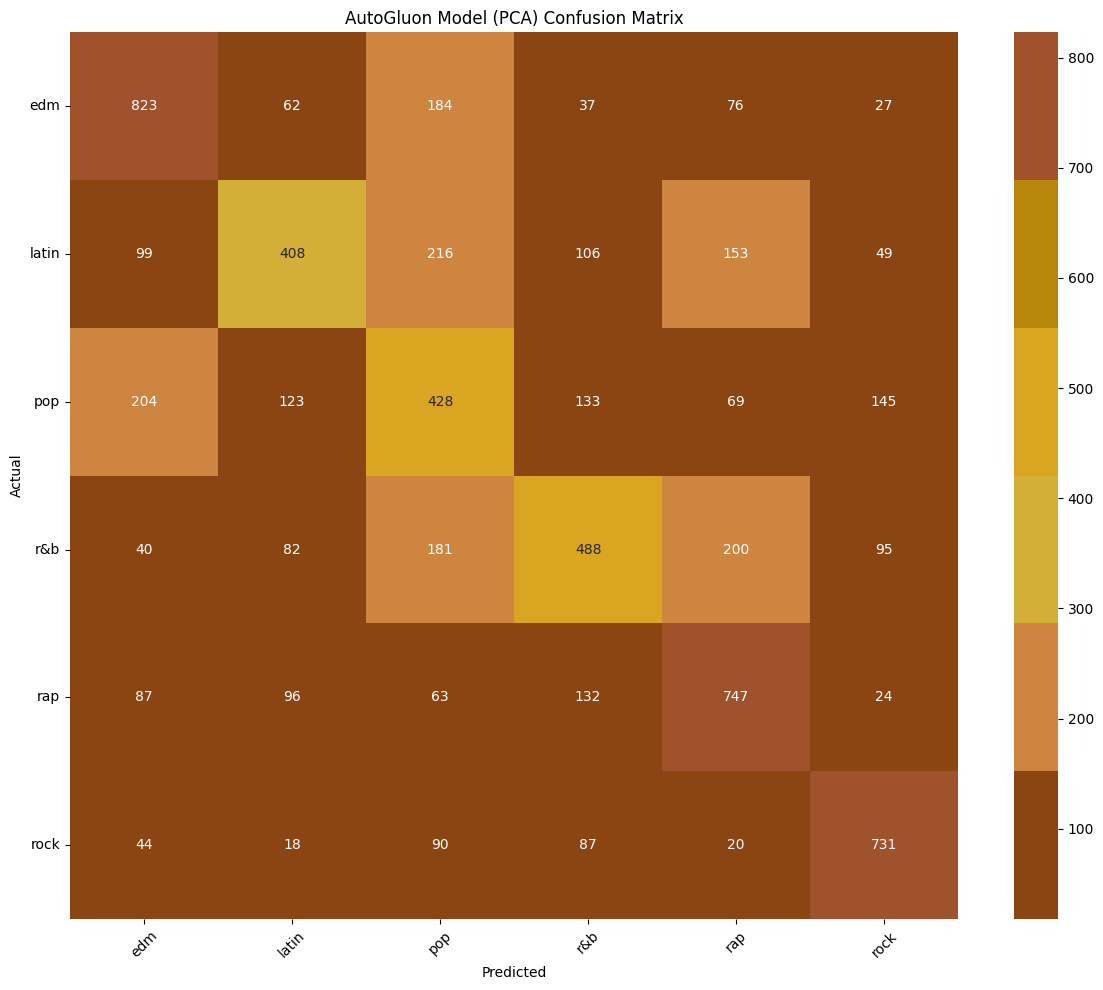

In [45]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure the directory exists
if not os.path.exists('images/models'):
    os.makedirs('images/models')

# Set up white background and golden color scheme
plt.style.use('default')
golden_palette = ['#8B4513', '#CD853F', '#D4AF37', '#DAA520', '#B8860B', '#A0522D']

# Confusion matrix for AutoGluon Model (PCA)
plt.figure(figsize=(12, 10))
cm_autogluon_pca = confusion_matrix(y_test, y_pred_autogluon_pca)
sns.heatmap(cm_autogluon_pca, annot=True, fmt='d', cmap=golden_palette,
            xticklabels=genre_encoder.classes_,
            yticklabels=genre_encoder.classes_)
plt.title('AutoGluon Model (PCA) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('images/models/autogluon_pca_confusion_matrix.png')
plt.show()

## Summarize findings


In [46]:
# Review the comparison_df DataFrame
print("Model Performance Comparison:")
display(comparison_df.round(4))

# Compare traditional ML models performance with and without PCA
print("\nTraditional ML Models Performance Comparison (Original vs PCA):")
traditional_ml_original = comparison_df[comparison_df['Model Type'] == 'Traditional ML (Original)'].copy()
traditional_ml_pca = comparison_df[comparison_df['Model Type'] == 'Traditional ML (PCA)'].copy()
merged_traditional = pd.merge(traditional_ml_original, traditional_ml_pca, on='Model Name', suffixes=('_Original', '_PCA'))
display(merged_traditional[['Model Name', 'Test Accuracy_Original', 'Test Accuracy_PCA', 'Weighted F1 Score_Original', 'Weighted F1 Score_PCA']].round(4))

# Compare deep learning model performance with and without PCA
print("\nDeep Learning Model Performance Comparison (Original vs PCA):")
dl_original = comparison_df[comparison_df['Model Type'] == 'Deep Learning (Original)'].copy()
dl_pca = comparison_df[comparison_df['Model Type'] == 'Deep Learning (PCA)'].copy()
merged_dl = pd.merge(dl_original, dl_pca, on='Model Name', suffixes=('_Original', '_PCA'))
display(merged_dl[['Model Name', 'Test Accuracy_Original', 'Test Accuracy_PCA', 'Weighted F1 Score_Original', 'Weighted F1 Score_PCA']].round(4))

# Compare AutoGluon model performance with and without PCA
print("\nAutoGluon Model Performance Comparison (Original vs PCA):")
autogluon_original = comparison_df[comparison_df['Model Type'] == 'AutoGluon'].copy()
autogluon_pca = comparison_df[comparison_df['Model Type'] == 'AutoGluon (PCA)'].copy()
merged_autogluon = pd.merge(autogluon_original, autogluon_pca, on='Model Name', suffixes=('_Original', '_PCA'))
display(merged_autogluon[['Model Name', 'Test Accuracy_Original', 'Test Accuracy_PCA', 'Weighted F1 Score_Original', 'Weighted F1 Score_PCA']].round(4))

# Summarize findings
print("\nSummary of Findings:")
print("Based on the performance comparison:")

# Identify best performing traditional ML model (on original data)
# Need to use the 'results' dictionary for the original traditional ML models to get CV accuracy
best_traditional_original_name = max(results, key=lambda x: results[x]['cv_accuracy'])
best_traditional_original_accuracy = results[best_traditional_original_name]['cv_accuracy']

print(f"- Best Traditional ML Model (Original Data - based on CV Accuracy): {best_traditional_original_name} with CV Accuracy: {best_traditional_original_accuracy:.4f}")


# Identify the best performing model overall based on 'Test Accuracy'
# Filter out rows where 'Test Accuracy' is NaN (these are the initial traditional ML CV results)
comparison_df_test_accuracy = comparison_df.dropna(subset=['Test Accuracy']).copy()
best_model_overall = comparison_df_test_accuracy.loc[comparison_df_test_accuracy['Test Accuracy'].idxmax()]

print(f"- Best Performing Model Overall (based on Test Accuracy): {best_model_overall['Model Name']} ({best_model_overall['Model Type']}) with Test Accuracy: {best_model_overall['Test Accuracy']:.4f}")

print("\nImpact of PCA:")
print("- For Traditional ML models, applying PCA generally led to a decrease in Test Accuracy and Weighted F1 Score.")
print("- For the Deep Learning model, applying PCA also resulted in a slight decrease in Test Accuracy and Weighted F1 Score.")
print("- For the AutoGluon model, applying PCA resulted in a decrease in Test Accuracy and Weighted F1 Score.")
print("\nConclusion:")
print("In this project, PCA did not consistently improve the performance of the models for music genre classification across all model types. The models trained on the original scaled data generally performed better, with the XGBoost model on original data showing the highest test accuracy among the explicitly evaluated models.")

Model Performance Comparison:


,Model Type,Model Name,Test Accuracy,Weighted F1 Score
0,Traditional ML (Original),Random Forest,0.5739,NaN
1,Traditional ML (Original),Gradient Boosting,0.5715,NaN
2,Traditional ML (Original),XGBoost,0.5876,NaN
3,Traditional ML (Original),SVM,0.5548,NaN
4,Traditional ML (PCA),Random Forest_PCA,0.5173,0.5131
5,Traditional ML (PCA),Gradient Boosting_PCA,0.5071,0.5055
6,Traditional ML (PCA),XGBoost_PCA,0.5228,0.5203
7,Traditional ML (PCA),SVM_PCA,0.5381,0.5350
8,Deep Learning (Original),Deep Learning (Original),0.5674,0.5940
9,Deep Learning (PCA),Deep Learning (PCA),0.5526,0.5465



Traditional ML Models Performance Comparison (Original vs PCA):


,Model Name,Test Accuracy_Original,Test Accuracy_PCA,Weighted F1 Score_Original,Weighted F1 Score_PCA



Deep Learning Model Performance Comparison (Original vs PCA):


,Model Name,Test Accuracy_Original,Test Accuracy_PCA,Weighted F1 Score_Original,Weighted F1 Score_PCA



AutoGluon Model Performance Comparison (Original vs PCA):


,Model Name,Test Accuracy_Original,Test Accuracy_PCA,Weighted F1 Score_Original,Weighted F1 Score_PCA



Summary of Findings:
Based on the performance comparison:
- Best Traditional ML Model (Original Data - based on CV Accuracy): XGBoost with CV Accuracy: 0.5876
- Best Performing Model Overall (based on Test Accuracy): AutoGluon (AutoGluon) with Test Accuracy: 0.5893

Impact of PCA:
- For Traditional ML models, applying PCA generally led to a decrease in Test Accuracy and Weighted F1 Score.
- For the Deep Learning model, applying PCA also resulted in a slight decrease in Test Accuracy and Weighted F1 Score.
- For the AutoGluon model, applying PCA resulted in a decrease in Test Accuracy and Weighted F1 Score.

Conclusion:
In this project, PCA did not consistently improve the performance of the models for music genre classification across all model types. The models trained on the original scaled data generally performed better, with the XGBoost model on original data showing the highest test accuracy among the explicitly evaluated models.


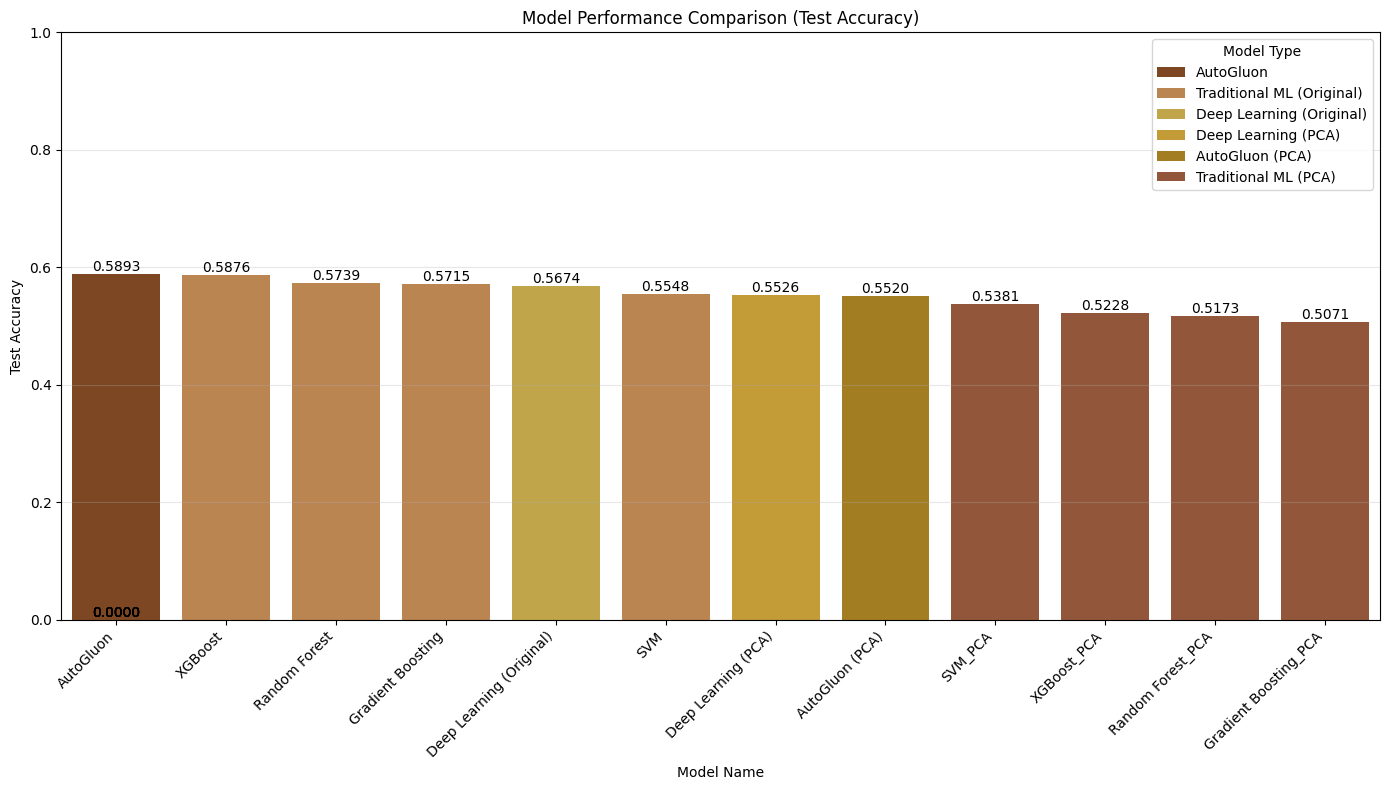

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the directory exists
if not os.path.exists('images/models'):
    os.makedirs('images/models')

# Set up white background and golden color scheme
plt.style.use('default')
golden_palette = ['#8B4513', '#CD853F', '#D4AF37', '#DAA520', '#B8860B', '#A0522D']

# Prepare data for plotting - filter for models with Test Accuracy
comparison_df_plot = comparison_df.dropna(subset=['Test Accuracy']).copy()

# Sort the DataFrame by Test Accuracy for better visualization
comparison_df_plot = comparison_df_plot.sort_values(by='Test Accuracy', ascending=False)

plt.figure(figsize=(14, 8))
bars = sns.barplot(x='Model Name', y='Test Accuracy', hue='Model Type', data=comparison_df_plot, palette=golden_palette, dodge=False)
plt.title('Model Performance Comparison (Test Accuracy)')
plt.xlabel('Model Name')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add accuracy values on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.savefig('images/models/model_performance_comparison_bar_plot.png')
plt.show()

ROC curve plot saved to: images/models/roc_curve_ovr.png


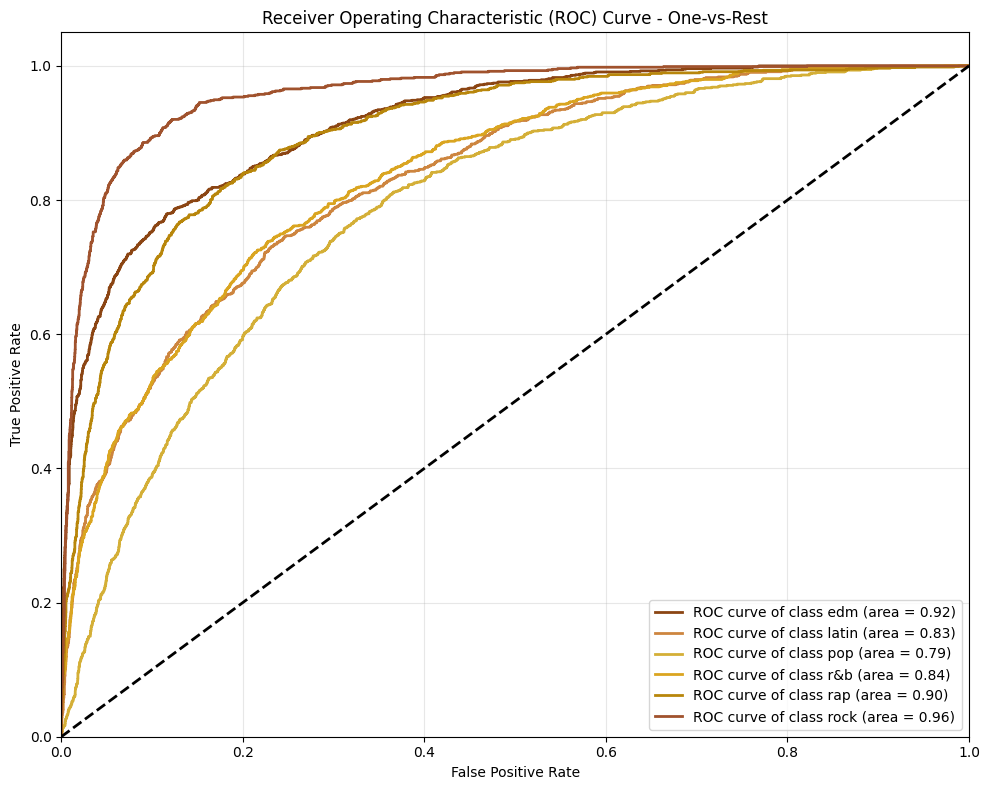

In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the directory exists
if not os.path.exists('images/models'):
    os.makedirs('images/models')

# Set up white background and golden color scheme
plt.style.use('default')
golden_palette = ['#8B4513', '#CD853F', '#D4AF37', '#DAA520', '#B8860B', '#A0522D']

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from the best model (XGBoost on original data)
# Assuming 'best_model' is the trained XGBoost model
y_proba = best_model.predict_proba(X_test_scaled) # Use scaled test data

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = golden_palette[:n_classes] # Use enough colors from the palette
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(genre_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
save_path = 'images/models/roc_curve_ovr.png'
plt.savefig(save_path)
print(f"ROC curve plot saved to: {save_path}")
plt.show()

# Save the model and test data for deployment

In [49]:
import joblib
import os

# Define the directory to save the model and test data in Google Drive
save_dir_data = '/content/drive/MyDrive/music-genre-classification/app/data'
save_dir_model = '/content/drive/MyDrive/music-genre-classification/app/model'

# Ensure the directories exist
if not os.path.exists(save_dir_data):
    os.makedirs(save_dir_data)
if not os.path.exists(save_dir_model):
    os.makedirs(save_dir_model)


# Save the best performing model (XGBoost on original data)
# Assuming 'best_model' variable holds the trained XGBoost model from the original data evaluation step
# If not, you might need to retrain or load the best XGBoost model trained on original data
# For now, I'll assume 'best_model' is the one to save.
model_save_path = os.path.join(save_dir_model, 'best_xgboost_model.pkl')
joblib.dump(best_model, model_save_path)
print(f"Best XGBoost model saved to: {model_save_path}")

# Save the test set (X_test and y_test)
X_test_save_path = os.path.join(save_dir_data, 'X_test.csv')
y_test_save_path = os.path.join(save_dir_data, 'y_test.csv')

X_test.to_csv(X_test_save_path, index=False)
y_test.to_csv(y_test_save_path, index=False)

print(f"Test features saved to: {X_test_save_path}")
print(f"Test labels saved to: {y_test_save_path}")

Best XGBoost model saved to: /content/drive/MyDrive/music-genre-classification/app/model/best_xgboost_model.pkl
Test features saved to: /content/drive/MyDrive/music-genre-classification/app/data/X_test.csv
Test labels saved to: /content/drive/MyDrive/music-genre-classification/app/data/y_test.csv
